In [2]:
%autosave 0
from __future__ import print_function

Autosave disabled


# RMSD/eRMSD calculation#

We here show how to calculate  distances between three-dimensional structures. 
eRMSD can be calculated using the function  
```python
ermsd = bb.ermsd(reference_file,target_file)
```
`reference_file` and `target_file` can be e.g. PDB files. eRMSD between reference and all frames in a simulation can be calculated by specifying the trajectory and topology files:  

```python
ermsd = bb.ermsd(reference_file,target_traj_file,topology=topology_file)
```
All trajectory formats accepted by MDTRAJ (e.g. pdb, xtc, trr, dcd, binpos, netcdf, mdcrd, prmtop) can be used.
Let us see a practical example:

In [3]:
# import barnaba
import barnaba as bb

# define trajectory and topology files
native="uucg2.pdb"
traj = "../test/data/UUCG.xtc"
top = "../test/data/UUCG.pdb"

# calculate eRMSD between native and all frames in trajectory
ermsd = bb.ermsd(native,traj,topology=top)


# Loaded reference uucg2.pdb 
# Loaded target ../test/data/UUCG.xtc 



We plot the eRMSD over time (every 50 frames to make the plot nicer) and make an histogram

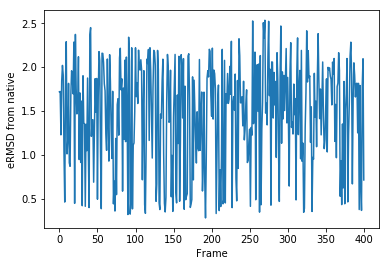

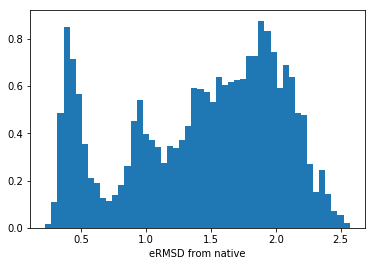

In [15]:
import matplotlib.pyplot as plt
plt.xlabel("Frame")
plt.ylabel("eRMSD from native")
plt.plot(ermsd[::50])
plt.show()

plt.hist(ermsd,density=True,bins=50)
plt.xlabel("eRMSD from native")
plt.show()

As a rule of thumb, eRMSD below 0.7-0.8 can be considered *low*, as such the peak around 0.4 eRMSD corresponds to structures that are very similar to the native. 

**Nota Bene**
- eRMSD is a dimensionless number. 
- Remember to remove periodic boundary conditions before performing the analysis.

We can also calculate the root mean squared deviation (RMSD) after optimal superposition by using 
```python
rmsd = bb.rmsd(reference_file,target_file)
```
or
```python
rmsd = bb.rmsd(reference_file,target_traj_file,topology=topology_file)
```
for trajectories. By default RMSD is calculated using backbone atoms only (`heavy_atom=False`): this makes it possible to calculate RMSD between structures with different sequences. If  `heavy_atom=True`, RMSD is calculated using all heavy atoms. Values are expressed in nanometers.


# found  93 atoms in common


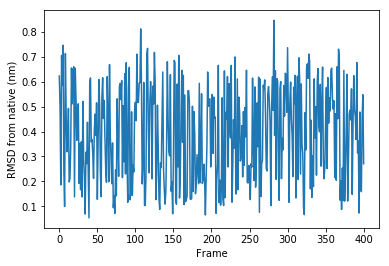

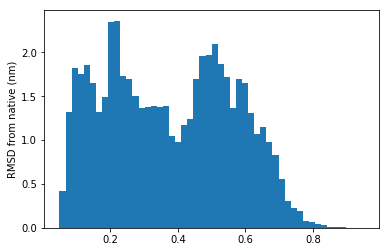

In [5]:
# calculate RMSD
rmsd = bb.rmsd(native,traj,topology=top,heavy_atom=False)

# plot time series
plt.xlabel("Frame")
plt.ylabel("RMSD from native (nm)")
plt.plot(rmsd[::50])
plt.show()

# make histogram
plt.hist(rmsd,density=True,bins=50)
plt.ylabel("RMSD from native (nm)")
plt.show()


Structures with eRMSD lower than 0.7 are typically significantly similar to the reference.
Note that structures with *low* RMSD (less than 0.4 nm) may be very different from native. We can check if this is true by comparing RMSD and eRMSD

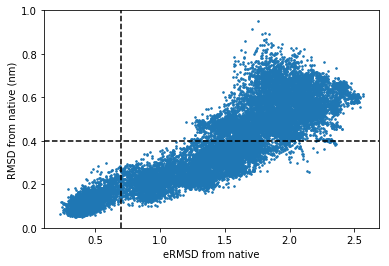

In [6]:
plt.xlabel("eRMSD from native")
plt.ylabel("RMSD from native (nm)")
plt.axhline(0.4,ls = "--", c= 'k')
plt.axvline(0.7,ls = "--", c= 'k')
plt.scatter(ermsd,rmsd,s=2.5)
plt.show()

We can clearly see that the two measures are correlated, but several structures with low RMSD have very large eRMSD.
We cherry-pick a structure with RMSD from native $\approx$ 0.3 nm, but high eRMSD.


Highest eRMSD for structures with  RMSD ~ 0.3nm
eRMSD:2.149; RMSD: 0.257 nm


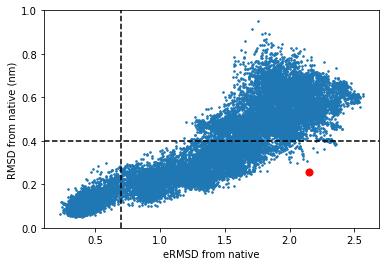

In [7]:
import numpy as np
low_rmsd = np.where(rmsd<0.3)
idx_a = np.argsort(ermsd[low_rmsd])[-1]
low_e = low_rmsd[0][idx_a]
print("Highest eRMSD for structures with  RMSD ~ 0.3nm")
print("eRMSD:%5.3f; RMSD: %5.3f nm" % (ermsd[low_e],rmsd[low_e]))

plt.xlabel("eRMSD from native")
plt.ylabel("RMSD from native (nm)")
plt.axhline(0.4,ls = "--", c= 'k')
plt.axvline(0.7,ls = "--", c= 'k')

plt.scatter(ermsd,rmsd,s=2.5)
plt.scatter(ermsd[low_e],rmsd[low_e],s=50,c='r')
plt.show()

We can extract a frame from the simulation using the save function from MDTraj. 
Aligned structures are written to disk by passing a string `out` to the `rmsd` function.  

In [8]:
import mdtraj as md

# load trajectory
tt = md.load(traj,top=top)

# save low ermsd 
tt[low_e].save("low_rmsd.pdb")

# align to native and write aligned PDB to disk
rmsd1 = bb.rmsd(native,'low_rmsd.pdb',out='low_rmsd_align.pdb')

# found  93 atoms in common


Finally, we use py3Dmol module to visualize the native and the low-RMSD/high-eRMSD structure.

In [14]:
import py3Dmol
pdb_e = open('low_rmsd_align.pdb','r').read()
pdb_n = open(native,'r').read()

p = py3Dmol.view(width=900,height=600,viewergrid=(1,2))
p.addModel(pdb_n,'pdb',viewer=(0,0))
p.addModel(pdb_e,'pdb',viewer=(0,1))

p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()


On the left the native UUCG and on the right the highest eRMSD among all structures with RMSD from native $\approx$ 0.3nm.